In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [3]:
event1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/First_Health_Camp_Attended.csv')
event2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Second_Health_Camp_Attended.csv')
event3 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Third_Health_Camp_Attended.csv')
patient_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/patient_attendance.csv')
patient_df1 = patient_df.copy()
print(patient_df1['Patient_ID'].nunique())

37633


In [4]:
train = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Train.csv')
train1 = train.copy()
test_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/test.csv') 
test_df1 = test_df.copy() 

In [5]:
event1['Patient_ID'].count

<bound method Series.count of 0       506181
1       494977
2       518680
3       509916
4       488006
         ...  
6213    502728
6214    511088
6215    507608
6216    488046
6217    508766
Name: Patient_ID, Length: 6218, dtype: int64>

In [6]:
event1['Patient_ID'].nunique

<bound method IndexOpsMixin.nunique of 0       506181
1       494977
2       518680
3       509916
4       488006
         ...  
6213    502728
6214    511088
6215    507608
6216    488046
6217    508766
Name: Patient_ID, Length: 6218, dtype: int64>

In [11]:
patient_df['Education_Score'].describe()

count    37633.000000
mean         0.036776
std          0.188214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Education_Score, dtype: float64

In [7]:
#X3a.to_csv('/home/allen/Galva/capstones/capstone2/data/D7.csv') 

In [8]:
checker = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv')

In [9]:
v1 = patient_df1['Event1_or_2'].values
v1_count1 = [x for x in v1 if x==1]
v1_count0 = [1 for x in v1 if x==0]

In [10]:
v11 = sum(v1_count1)
v10 = sum(v1_count0)
print(v10,v11)

26565 11068


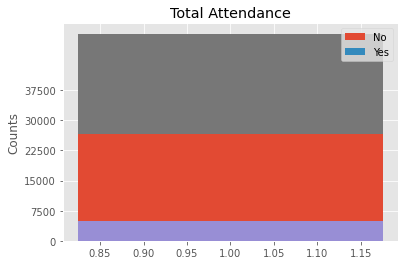

In [14]:

N = 1
yes,yes1 = [11068] ,[25000]
no,no1 = [26565], [5000]
ind = 1    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, no , width)
p2 = plt.bar(ind, yes, width,
             bottom=no)
p3 = plt.bar(ind, no1 , width)
p4 = plt.bar(ind, yes1 , width,
             bottom=no)

plt.ylabel('Counts')
plt.title('Total Attendance')

plt.yticks(np.arange(0, 45000 , 7500))
plt.legend(('No', 'Yes'))

plt.show()

In [7]:
edu = patient_df1['Education_Score2'].values
edu_ = []
for i in edu:
    if i >=90 :
        edu_.append(2)
    elif i >=80 and i<90:
        edu_.append(1)
    else:
        edu_.append(0)

KeyError: 'Education_Score2'

In [ ]:
len(edu_)

In [ ]:
>>> (6218, 6)
(6218, 6)
>>> (7819, 4)
(7819, 4)
>>> (6515, 5)
(6515, 5)


In [ ]:
len(patient_df1[patient_df1["Event1_or_2"] == 1]) 

In [ ]:
t = patient_df1['Education_Scorez'].values
t2 = np.array(t)

In [ ]:
patient_df1.head()

In [ ]:
patient_df1['Edu1'] = patient_df1['Education_Scorez'].apply(lambda x:1 if x == 1 else 0)
patient_df1['Edu2'] = patient_df1['Education_Scorez'].apply(lambda x:1 if x == 2 else 0)

In [ ]:
patient_df1.head()

In [ ]:
train = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Train.csv')
train1 = train.copy()
test_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/test.csv') 
test_df1 = test_df.copy() 

In [ ]:
test_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/test.csv') 


In [ ]:
train.shape

In [ ]:
def make_comboz(dataframe):
    '''
    Create a column for each patient & event
    '''
    dataframe['patient_events'] = list(zip(dataframe.Patient_ID,dataframe.Health_Camp_ID))
    print(dataframe.shape, 'MAKLE tupple_column for each camp/patient & ID ')
    return dataframe 

In [ ]:
newer_df = make_comboz(train1)

In [ ]:
newer_df.head()

In [ ]:
newer_df['patient_events'].nunique()

In [ ]:
checker.describe()

In [ ]:
checker.columns

In [ ]:
drop_thez=[ 'Patient_ID_x', 'Health_Camp_ID', 'Registration_Date', 'Category1_y','Camp_Start_Date2', 'Camp_End_Date2', 'patient_event', 'Unnamed: 0_x',
       'Unnamed: 0.1_x', 'Online_Follower_x', 'First_Interaction','Employer_Category' , 'Event1_or_2_x' ,'Category1_y', 'Unnamed: 0_y', 'Unnamed: 0.1_y', 'Patient_ID_y',
       'Online_Follower_y', 'Event1_or_2_y','Health Score', 'Camp_length',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number',   
]

In [ ]:
test1224 = checker.drop(drop_thez, axis=1)

In [ ]:
test1224 = test1224.drop('Camp_length', axis=1)

In [ ]:
test1224.info()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [ ]:
train1_1 = train1['Var1'].to_frame()
train1_2 = train1['Var2'].to_frame()
train1_3 = train1['Var3'].to_frame() 
train1_4 = train1['Var4'].to_frame() 
train1_5 = train1['Var5'].to_frame() 

In [ ]:
train1_1 = scaler.fit_transform(train1_1 )
train1_2 = scaler.fit_transform(train1_2 )
train1_3 = scaler.fit_transform(train1_3 )
train1_4 = scaler.fit_transform(train1_4 )
train1_5 = scaler.fit_transform(train1_5 )  

In [ ]:
train1['train1_1'] = train1_1
train1['train1_2'] = train1_2
train1['train1_3'] = train1_3
train1['train1_4'] = train1_4
train1['train1_5'] = train1_5

In [ ]:
train1.drop(['Var1','Var2','Var3','Var4','Var5']  , axis=1, inplace=True)

In [ ]:
test1df1 = test_df1['Var1'].to_frame()
test1df2 = test_df1['Var2'].to_frame()
test1df3 = test_df1['Var3'].to_frame()
test1df4 = test_df1['Var4'].to_frame()
test1df5 = test_df1['Var5'].to_frame()

In [ ]:
test1df1 = scaler.fit_transform(test1df1 )
test1df2 = scaler.fit_transform(test1df2 )
test1df3 = scaler.fit_transform(test1df3 )
test1df4 = scaler.fit_transform(test1df4 )
test1df5 = scaler.fit_transform(test1df5 )  

In [ ]:
test_df1['test1df1'] = test1df1
test_df1['test1df2'] = test1df2
test_df1['test1df3'] = test1df3
test_df1['test1df4'] = test1df4
test_df1['test1df5'] = test1df5

In [ ]:
test_df1.drop(['Var1','Var2','Var3','Var4','Var5']  , axis=1, inplace=True)

In [ ]:
# train1.to_csv('/home/allen/Galva/capstones/capstone2/data/train_scaled.csv')
# test_df1.to_csv('/home/allen/Galva/capstones/capstone2/data/test_scaled.csv')

In [ ]:
train1.head()

In [ ]:
'''

print(df_head.to_markdown()) 

'''

In [ ]:
#patient_df1.to_csv('d5.csv')

In [ ]:
#X3a.to_csv('/home/allen/Galva/capstones/capstone2/data/D7.csv') 

In [ ]:
from numpy import argmax 

In [ ]:
print(train.columns)
print(test_df.columns)
print(patient_df1.columns)

In [ ]:
train1 = train1.merge(patient_df1, on=['Patient_ID'], how = 'left')
test_df1 = test_df1.merge(patient_df1, on = ['Patient_ID'], how='left')

In [ ]:
print(train1.shape,test_df1.shape)

In [ ]:
patient1_df_ = patient1_df.copy()
train1_ = train1.copy() 

trainz = train1_.merge(patient_df1_, on=['Patient_ID'], how = 'right')
test_dfz = test_df1_.merge(patient_df1_, on = ['Patient_ID'], how='right')

In [ ]:
print(trainz.shape,test_dfz.shape)

In [ ]:
test_df1.columns

In [ ]:
# #.drop(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'test1df1',
#        'test1df2', 'test1df3', 'test1df4', 'test1df5', 'Unnamed: 0',
#        'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Online_Follower', 'LinkedIn_Shared',
#        'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
#        'First_Interaction', 'City_Type', 'Employer_Category', 'Job_Type',
#        'Event1_or_2', 'Education_Score2', 'Education_Scorez', '2', '3', '4',
#        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '9999', 'B', 'C',
#        'D', 'E', 'F', 'G', 'H', 'I', 'Z', 'Edu1', 'Edu2'],axis=1 )

In [ ]:
#.drop(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'test1df1',
#        'test1df2', 'test1df3', 'test1df4', 'test1df5', 'Unnamed: 0',
#        'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Online_Follower', 'LinkedIn_Shared',
#        'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
#        'First_Interaction', 'City_Type', 'Employer_Category', 'Job_Type',
#        'Event1_or_2', 'Education_Score2', 'Education_Scorez', '2', '3', '4',
#        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '9999', 'B', 'C',
#        'D', 'E', 'F', 'G', 'H', 'I', 'Z', 'Edu1', 'Edu2'],axis=1 )

In [ ]:
#'2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '13', '14',

In [ ]:
# 'Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1',
# 'Registration_Date', 'Employer_Category','Patient_ID','First_Interaction', 
# 'Health_Camp_ID','Twitter_Shared','Facebook_Shared','Income','Education_Score',
# 'Age', 'City_Type', 'Job_Type', 
# 'Education_Score2','Education_Scorez','5','12', '7', '2'],axis=1)

In [ ]:
train1 = train1.drop(['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1','Registration_Date', 'Employer_Category','Patient_ID','First_Interaction', 'Health_Camp_ID','Twitter_Shared','Facebook_Shared','Income','Education_Score','Age', 'City_Type', 'Job_Type', 'Education_Score2','Education_Scorez','2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '14','B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'Z', 'Edu1','Edu2'],axis=1)

In [ ]:
test_df1 = test_df1.drop(['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1','Registration_Date', 'Employer_Category','Patient_ID','First_Interaction','Health_Camp_ID','Twitter_Shared','Facebook_Shared','Income','Education_Score','Age', 'City_Type', 'Job_Type', 'Education_Score2','Education_Scorez','2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '14','B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'Z', 'Edu1','Edu2'],axis=1)

In [ ]:
checker.columns

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
ynot = checker.pop('y_target')

In [ ]:
y1, y2 = train1.pop('Event1_or_2') , test_df1.pop('Event1_or_2')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(checker,ynot,test_size = .3, random_state=101)

In [ ]:
print(len(y2))

In [ ]:
 # 26,565

In [ ]:
X_train , X_test = train1 , test_df1

In [ ]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver="lbfgs")
logmodel.fit(X_train, ynot)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver="lbfgs")
logmodel.fit(X_train, y1)

In [ ]:
predictions = logmodel.predict_proba(X_test)[:,1]

In [ ]:
pure_proba = logmodel.predict(X_test)

In [ ]:
print(sum(pure_proba ))
print(sum(y2) ) 

In [ ]:
preds, preds2 = predictions>.5 ,predictions>.55

In [ ]:
for name, coef in zip(preds2[1:], logmodel.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2,preds2) ) 

In [ ]:
print(confusion_matrix(y2,preds)) 

In [ ]:
#  8954  9552 ,
#     3998 12745]]
# # 26,565

In [ ]:
print(classification_report(y2,preds) ) 

In [ ]:
print(confusion_matrix(y2,preds2)) 

In [ ]:
print(classification_report(y2,preds2) ) 

In [ ]:
'''[[ 9249  9257]
 [ 4080 12663]]
 FORESt
 '''

In [ ]:
test_df1.head()

In [ ]:
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [ ]:
X = test_df1
X_const = add_constant(X, prepend=True)
y3 = y2.copy()
logit_model = Logit(y3, X_const).fit()

In [ ]:
logit_model.summary()

In [ ]:
kfold = KFold(n_splits=5)

accuracies = []
precisions = []
recalls = []

#X_train, X_test, y_train, y_test = train_test_split(X, y)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

In [ ]:
''' 
n=20 
Accuracy: 0.6178722087906098
Precision: 0.6242284105951045
Recall: 0.9587480176361393
'''
#[[16088  2418]
 #[ 9349  7394]]
'''
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249
'''



'''
1am night before
Accuracy: 0.6787640530222973
Precision: 0.7425212530267482
Recall: 0.7106330368299469






'''

In [ ]:
def simple_plot(ax, x, y, x_label, y_label, title):
    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

In [ ]:

model3 = LogisticRegression(solver='lbfgs')
model3.fit(X_train, y1)
probabilities2 = model3.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(probabilities2, y2)

fig, ax = plt.subplots(figsize=(12, 6))

simple_plot(ax, fpr, tpr, 
            "False Positive Rate (1 - Specificity)", 
            "True Positive Rate (Sensitivity, Recall)", 
            "ROC Plot of Patient Predictions Mod")

In [ ]:
'''
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249
'''

In [ ]:
'''
              precision    recall  f1-score   support

           0       0.73      0.35      0.48     18506
           1       0.54      0.85      0.67     16743

    accuracy                           0.59     35249
   macro avg       0.64      0.60      0.57     35249
weighted avg       0.64      0.59      0.57     35249


'''

'''

eNDOM FOREST 1AM

[[ 9228  9278]
 [ 4058 12685]]
 



'''

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y1)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
print(classification_report(y2,rfc_preds) ) 

In [ ]:
print(confusion_matrix(y2,rfc_preds)) 

In [ ]:
model4 = RandomForestClassifier(n_estimators = 200)
model4.fit(X_train, y1)
proba_Forest = model4.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(proba_Forest, y2)

fig, ax = plt.subplots(figsize=(12, 6))

simple_plot(ax, fpr, tpr, 
            "False Positive Rate (1 - Specificity)", 
            "True Positive Rate (Sensitivity, Recall)", 
            "ROC Plot Patient Predictions Random Forest")

In [ ]:
X_train = train1
y_train = y1

In [ ]:
print(X_test.shape)

In [ ]:
X_test = test_df1
y_test= y2

In [ ]:
ridge = Ridge(alpha=6)
ridge.fit(X_train,y_train)

In [ ]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [ ]:
preds = ridge.predict(X_test)
mse = rss(y_test,preds)
print("MSE for Ridge(alpha=2.5): {:2.2f}".format(mse))

In [ ]:
def cv(X, y, base_estimator, n_folds, random_seed=154):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train, test) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train], y[train]
        X_cv_test, y_cv_test = X[test], y[test]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = clone(base_estimator)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [ ]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train.values, y_train.values, 
                                     Ridge(alpha=6), n_folds=n_folds)

In [ ]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))

In [ ]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [ ]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Ridge, ridge_alphas)

In [ ]:
ridge_mean_cv_errors_train = ridge_cv_errors_train.mean(axis=0)
ridge_mean_cv_errors_test = ridge_cv_errors_test.mean(axis=0)

In [ ]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_train)
ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_test)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.set_title("Ridge Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")

In [ ]:
ridge_models = []

for alpha in ridge_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_std, y_train_std)
    ridge_models.append(ridge)

In [ ]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_train.columns))),
                     index=ridge_alphas, columns=X_train.columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))

for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")

In [ ]:
lasso_alphas = np.logspace(-3, 1, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Lasso, lasso_alphas, max_iter=5000)

In [ ]:
lasso_cv_errors_test.shape

In [ ]:
lasso_mean_cv_errors_train = lasso_cv_errors_train.mean(axis=0)
lasso_mean_cv_errors_test = lasso_cv_errors_test.mean(axis=0)

lasso_optimal_alpha = get_optimal_alpha(lasso_mean_cv_errors_test)
    
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_train)
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_test)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.set_title("LASSO Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")

In [ ]:
paths = pd.DataFrame(np.empty(shape=(len(lasso_alphas), len(X_train.columns))),
                     index=lasso_alphas, columns=X_train.columns)

for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
fig, ax = plt.subplots(figsize=(14, 4))
for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(lasso_alphas), path, label=column)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")

In [ ]:
standardizer = XyScaler()
standardizer.fit(X_train.values, y_train.values)
X_train_std, y_train_std = standardizer.transform(X_train.values, y_train.values)
X_test_std, y_test_std = standardizer.transform(X_test.values, y_test.values)

In [ ]:
final_ridge = Ridge(alpha=ridge_optimal_alpha).fit(X_train_std, y_train_std)
final_lasso = Lasso(alpha=lasso_optimal_alpha).fit(X_train_std, y_train_std)
final_lr = LinearRegression().fit(X_train_std, y_train_std)

In [ ]:
final_ridge_rss = rss(y_test_std, final_ridge.predict(X_test_std))
final_lasso_rss = rss(y_test_std, final_lasso.predict(X_test_std))
final_lr_rss = rss(y_test_std, final_lr.predict(X_test_std))

In [ ]:
print("Final Ridge RSS: {:2.3f}".format(final_ridge_rss))
print("Final Lasso RSS: {:2.3f}".format(final_lasso_rss))
print("Final Linear Regression RSS: {:2.3f}".format(final_lr_rss))